<a href="https://colab.research.google.com/github/AlamLF/data_science/blob/master/Fuzzy_C_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%shell
git clone https://github.com/MarioROT/IML-MAI


Cloning into 'IML-MAI'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 101 (delta 46), reused 78 (delta 31), pack-reused 0
Receiving objects: 100% (101/101), 446.31 KiB | 2.25 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [4]:
#First we define the libraries we will work with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import arff

In [5]:
data = arff.loadarff('/content/IML-MAI/Work1/data/raw/iris.arff')
df=pd.DataFrame(data[0])

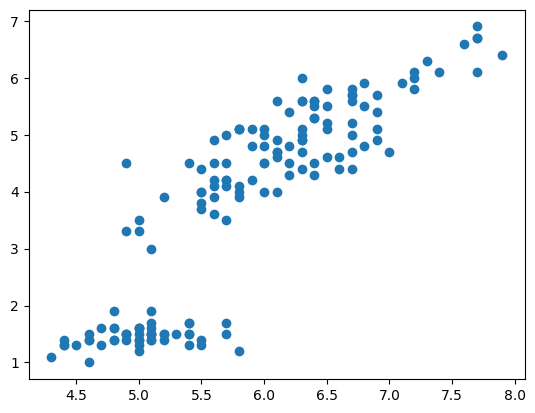

In [6]:
plt.scatter(df.sepallength,df.petallength)

In [319]:
data_test=np.array([(1,2,3),(2,3,5),(3,4,5),(4,4,5)],dtype=int)
data_test.shape

(4, 3)

In [228]:
C=3
m=2
eps=0.01



In [315]:
#1. Initialize the membership matrix with the shape of instances and clusters
def U_rand(data,C):
  U_random= np.random.rand(data.shape[0],C)
  sum_row=np.sum(U_random,axis=1)
  U_norm=np.transpose(np.transpose(U_random)/sum_row)
  return U_norm

In [323]:
test=U_rand(data_test,C)

print(data_test, '\n',test)
print(test.shape, '\n',test.shape)

[[1 2 3]
 [2 3 5]
 [3 4 5]
 [4 4 5]] 
 [[0.42028557 0.50434581 0.07536862]
 [0.45150026 0.02632328 0.52217646]
 [0.12245265 0.67141818 0.20612917]
 [0.12782815 0.64956681 0.22260505]]
(4, 3) 
 (4, 3)


In [347]:
#2 Calculate the centers with a given membership matrix
def Cluster_centers(data,C,m,U):
  mu=U
  mu_pot=mu**m
  denominator=sum(mu_pot)
  mu_pot_t=np.transpose(mu_pot)
  centers=[]

  for center in range(C):
    coordinates=[]
    for value in range (data.shape[1]):
      coordinate=np.sum(mu_pot_t[center]*data[:,value])/denominator[center]
      coordinates.append(coordinate)
    centers.append(coordinates)
  return np.array(centers)

In [353]:
x=Cluster_centers(data_test,3,2,test)
x

array([[1.68684619, 2.64716926, 4.14216454],
       [2.92242817, 3.54830319, 4.54891759],
       [2.36694964, 3.23316395, 4.96932739]])

In [229]:

mu=test
mu_pot=[value**m for value in mu]
mu_pot_t=np.transpose(mu_pot)
denominator=sum(mu_pot)

# print(mu[:,0],'\n')
# print(mu_pot_t[0],'\n')
# print(mu_pot_t[0]*data_test[:,0],'\n')

# np.sum(mu_pot_t[0]*data_test[:,0])/sum(mu_pot)[0]
centers=[]
for center in range(C):
  coordinates=[]
  for value in range (data_test.shape[1]):
    coordinate=np.sum(mu_pot_t[center]*data_test[:,value])/denominator[center]
    coordinates.append(coordinate)
  centers.append(coordinates)
print(centers)

[[2.4900269939189705, 3.1207168625730346, 4.141335498008314], [2.627849570780124, 3.449300397013246, 4.997762577951886], [1.1477339873993258, 2.140468378542235, 3.1860268837875743]]


In [230]:
Cluster_centers(data_test,C,m,test)

[[2.4900269939189705, 3.1207168625730346, 4.141335498008314],
 [2.627849570780124, 3.449300397013246, 4.997762577951886],
 [1.1477339873993258, 2.140468378542235, 3.1860268837875743]]

In [270]:
centers

[[2.4900269939189705, 3.1207168625730346, 4.141335498008314],
 [2.627849570780124, 3.449300397013246, 4.997762577951886],
 [1.1477339873993258, 2.140468378542235, 3.1860268837875743]]

In [361]:
#3 Calculate the distances for each data point given the centers for each cluster

def distances_to_clusters(data,C,m,centers):
  p = float(2/(m-1))
  distances=[]
  for center in range(C):
    to_cluster=[]
    for value in range(data.shape[0]):
      distance=np.power(sum(((data[value])-centers[center])**p),1/p)
      to_cluster.append(distance)
    distances.append(to_cluster)
  return np.array(distances)

In [364]:
y=distances_to_clusters(data_test,3,2,x)
y

array([[1.48159561, 0.97899772, 2.07132944, 2.81366545],
       [2.91412398, 1.16403843, 0.64305733, 1.25246413],
       [2.69582919, 0.43584203, 0.9948523 , 1.80439237]])

In [306]:
data_test.shape[0]

4

In [314]:
value=3
cent=0
distance=np.power(sum(((data_test[value])-np.array(centers[cent]))**p),1/p)
print(data_test[value],'\n')
print(centers[cent],'\n')
print(distance,'\n')

[4 4 5] 

[2.4900269939189705, 3.1207168625730346, 4.141335498008314] 

1.9469108972516995 



In [267]:
data_test

array([[1, 2, 3],
       [2, 3, 5],
       [3, 4, 5],
       [4, 4, 5]])

In [266]:
check=2
p = float(2/(m-1))
print(centers[check])
print(data_test[check])

print(((data_test[check])-np.array(centers[check]))**p)
print(sum(((data_test[check])-np.array(centers[check]))**p))
np.power(sum(((data_test[check])-np.array(centers[check]))**p),1/p)


[1.1477339873993258, 2.140468378542235, 3.1860268837875743]
[3 4 5]
[3.43088938 3.45785785 3.29049847]
10.179245698978363


3.1904930181679387

In [250]:
#4 Calculate the membership value for each distance
def membership_values(data,C,m,distances):
  p = float(2/(m-1))
  distances=[]
  for center in range(C):
    to_cluster=[]
    for value in range(data.shape[0]):
      distance=np.power(sum(((data[value])-np.array(distances[center]))**p),1/p)
      to_cluster.append(distance)
    distances.append(to_cluster)
  return distances

AttributeError: ignored

In [ ]:
def main:

